
week 9 Exercise Feature space
Ex 1

Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
Download the data

    Programatically download the data from the above link.
    Import the data into a Pandas dataframe.
    Show the head of the Pandas dataframe.

Feature engineering

    Reduce the dataset by:
        Make == Honda
        Fueltype == Gasoline
        Remove outliers. Hint: df[column name'] < df['column name'].quantile(0.90)
        Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
        Normalize data (reduce values to be between 0 and 1)

Linear regression

    Perform linear regression where x = horsepower and y = mpg
    What is the coefficient (slope) of your model? What does this number mean?
    According to your model, what is y when x=1.
    Show the regression line on a scatterplot with the other datapoints.



In [2]:
import requests
import pandas as pd
import seaborn as sb

df = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv')

ts_honda = df[df['Identification.Make']=='Honda']

ts_fuel = ts_honda[ts_honda['Fuel Information.Fuel Type']=='Gasoline']

twofeatures = ts_fuel[["Engine Information.Engine Statistics.Horsepower", "Fuel Information.Highway mpg"]]

normalized = twofeatures.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalized

,Engine Information.Engine Statistics.Horsepower,Fuel Information.Highway mpg
101,1.000000,0.238095
102,0.474026,0.523810
103,0.474026,0.523810
104,0.474026,0.523810
105,1.000000,0.380952
...,...,...
5067,0.863636,0.238095
5068,0.863636,0.190476
5069,0.863636,0.238095
5070,0.863636,0.190476


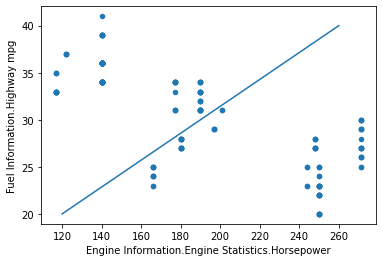

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

twofeatures.plot.scatter(x=0, y=1)
plt.plot([120, 260], [20, 40])

In [4]:
import sklearn.linear_model

horsepower = df[["Engine Information.Engine Statistics.Horsepower"]]
highway = df[["Fuel Information.Highway mpg"]]

model = sklearn.linear_model.LinearRegression()
model.fit(horsepower, highway)
model.coef_

array([[-0.0373255]])

In [5]:
predicted = model.predict([[1]])
print("When x is 1, y will be {}".format(predicted[0]))

When x is 1, y will be [34.18469391]
